## Inter Subject Coherence 

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy import signal
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import time
from progressbar import progressbar

In [3]:
def freq_scaling(f, old_sig, factor):
    len_new = 0
    for i in range (0, len(f),factor):
        len_new = len_new + 1

    f_new = np.zeros(shape=len_new)
    psd_new = np.zeros(shape=len_new)

    index = 0
    for i in range (0,len(f),factor):
        f_new[index] = f[i]
        psd_new[index] = psd[i]
        index = index + 1
    return f_new, psd_new

In [4]:
def get_coh(signal_1, signal_2):
    #f, coh = plt.cohere(F3_a, F3_b, 256, 1./.01)
    f, coh = signal.coherence(signal_1, signal_2, fs = 500, nperseg=1024)
    f, coh = get_freq_range(f, coh)
    return f, coh

In [5]:
def get_freq_range(f, coh):
    alpha_coh = []
    alpha_f = []

    for i in range (len(coh)):
        if (f[i] >= 4 and f[i] <= 12):
            alpha_coh.append(coh[i])
            alpha_f.append(f[i])
    return alpha_f, alpha_coh

In [6]:
def plot_coh(f, coh):
    plt.plot(f, coh)
    plt.ylim([0, 0.2])
    plt.grid()
    plt.show()

In [7]:
def plot_PSD(f, psd, title):
    plt.semilogy(f, psd)
    plt.ylim([1e-3, 100])
    plt.xlim([6, 15])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD')
    plt.title(title)
    plt.show()

In [8]:
f_sampling = 500
elec_name = ["F3","Fz","F4","FC1","FC2","C3","C4","CP1","CP2","P3","Pz","P4"]
no_of_electrode = len(elec_name)
no_of_subjects = 3

### For Resting State

In [9]:
RS_max_coh_arr = np.array([])
RS_max_coh_f_arr = np.array([])
RS_average_coh_arr = np.array([])

In [10]:
for electrode in progressbar(range (0,no_of_electrode)):   
    peak_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    peak_coh_f = np.zeros(shape=[no_of_subjects,no_of_subjects])
    average_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    for x in range (no_of_subjects):
        source_file_a = '../dataset/RS_individual/RS_'+str(x+1)+'.txt'
        
        Time_a, Fp1_a, Fz_a, F3_a, F7_a, FT9_a, FC5_a, FC1_a, C3_a, T7_a, TP9_a, CP5_a, CP1_a, Pz_a, P3_a, P7_a, O1_a, Oz_a, O2_a, P4_a, P8_a, TP10_a, CP6_a, CP2_a, C4_a, T8_a, FT10_a, FC6_a, FC2_a, F4_a, F8_a, Fp2_a = np.loadtxt( 
            source_file_a, 
            unpack = True)
        elec_1_mat = np.stack((F3_a, Fz_a, F4_a, FC1_a, FC2_a, C3_a, C4_a, CP1_a, CP2_a, P3_a, Pz_a, P4_a))
        # Only stacking motor region electrodes
        
        for y in range (no_of_subjects):
            source_file_b = '../dataset/RS_individual/RS_'+str(y+1)+'.txt'
            Time_b, Fp1_b, Fz_b, F3_b, F7_b, FT9_b, FC5_b, FC1_b, C3_b, T7_b, TP9_b, CP5_b, CP1_b, Pz_b, P3_b, P7_b, O1_b, Oz_b, O2_b, P4_b, P8_b, TP10_b, CP6_b, CP2_b, C4_b, T8_b, FT10_b, FC6_b, FC2_b, F4_b, F8_b, Fp2_b = np.loadtxt( 
                source_file_b,
                unpack = True)
            elec_2_mat = np.stack((F3_b, Fz_b, F4_b, FC1_b, FC2_b, C3_b, C4_b, CP1_b, CP2_b, P3_b, Pz_b, P4_b))
            # Only stacking motor region electrodes
            
            f, coh = get_coh(elec_1_mat[electrode], elec_2_mat[electrode])      
            max_coh = 0
            max_coh_f = 0
            sum_coh_alpha = 0

            for k in range(len(coh)):
                sum_coh_alpha = sum_coh_alpha + coh[k]
                if (max_coh < coh[k]):
                    max_coh = coh[k]
                    max_coh_f = f[k]

            peak_coh[x][y] = max_coh
            peak_coh_f[x][y] = max_coh_f
            average_coh[x][y] = (sum_coh_alpha/len(coh))
    
    #max_coh_arr.append((peak_coh[np.triu_indices(3)]))
    temp_coh_uppr = (np.triu(peak_coh, k=1))    
    temp_coh_f_uppr = (np.triu(peak_coh_f, k=1))
    temp_average_coh = (np.triu(average_coh, k=1))
    
    for p in range (no_of_subjects):
        for q in range (no_of_subjects):
            if (temp_coh_uppr[p][q] != 0):                
                RS_max_coh_arr = np.append(RS_max_coh_arr, temp_coh_uppr[p][q])
                RS_max_coh_f_arr = np.append(RS_max_coh_f_arr,temp_coh_f_uppr[p][q])
                RS_average_coh_arr = np.append(RS_average_coh_arr, temp_average_coh[p][q])

100% (12 of 12) |########################| Elapsed Time: 0:00:27 Time:  0:00:27


### For Deep Breathing

In [11]:
DB_max_coh_arr = np.array([])
DB_max_coh_f_arr = np.array([])
DB_average_coh_arr = np.array([])

In [12]:
for electrode in progressbar(range (0,no_of_electrode)):   
    peak_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    peak_coh_f = np.zeros(shape=[no_of_subjects,no_of_subjects])
    average_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    for x in range (no_of_subjects):
        source_file_a = '../dataset/DB_individual/DB_'+str(x+1)+'.txt'

        Time_a, Fp1_a, Fz_a, F3_a, F7_a, FT9_a, FC5_a, FC1_a, C3_a, T7_a, TP9_a, CP5_a, CP1_a, Pz_a, P3_a, P7_a, O1_a, Oz_a, O2_a, P4_a, P8_a, TP10_a, CP6_a, CP2_a, C4_a, T8_a, FT10_a, FC6_a, FC2_a, F4_a, F8_a, Fp2_a = np.loadtxt( 
            source_file_a, 
            unpack = True)
        elec_1_mat = np.stack((F3_a, Fz_a, F4_a, FC1_a, FC2_a, C3_a, C4_a, CP1_a, CP2_a, P3_a, Pz_a, P4_a))
        
        for y in range (no_of_subjects):
            source_file_b = '../dataset/DB_individual/DB_'+str(y+1)+'.txt'
            Time_b, Fp1_b, Fz_b, F3_b, F7_b, FT9_b, FC5_b, FC1_b, C3_b, T7_b, TP9_b, CP5_b, CP1_b, Pz_b, P3_b, P7_b, O1_b, Oz_b, O2_b, P4_b, P8_b, TP10_b, CP6_b, CP2_b, C4_b, T8_b, FT10_b, FC6_b, FC2_b, F4_b, F8_b, Fp2_b = np.loadtxt( 
                source_file_b,
                unpack = True)
            elec_2_mat = np.stack((F3_b, Fz_b, F4_b, FC1_b, FC2_b, C3_b, C4_b, CP1_b, CP2_b, P3_b, Pz_b, P4_b))
            
            f, coh = get_coh(elec_1_mat[electrode], elec_2_mat[electrode])      
            max_coh = 0
            max_coh_f = 0
            sum_coh_alpha = 0

            for k in range(len(coh)):
                sum_coh_alpha = sum_coh_alpha + coh[k]
                if (max_coh < coh[k]):
                    max_coh = coh[k]
                    max_coh_f = f[k]

            peak_coh[x][y] = max_coh
            peak_coh_f[x][y] = max_coh_f
            average_coh[x][y] = (sum_coh_alpha/len(coh))
    
    #max_coh_arr.append((peak_coh[np.triu_indices(3)]))
    temp_coh_uppr = (np.triu(peak_coh, k=1))    
    temp_coh_f_uppr = (np.triu(peak_coh_f, k=1))
    temp_average_coh = (np.triu(average_coh, k=1))
    
    for p in range (no_of_subjects):
        for q in range (no_of_subjects):
            if (temp_coh_uppr[p][q] != 0):                
                DB_max_coh_arr = np.append(DB_max_coh_arr, temp_coh_uppr[p][q])
                DB_max_coh_f_arr = np.append(DB_max_coh_f_arr,temp_coh_f_uppr[p][q])
                DB_average_coh_arr = np.append(DB_average_coh_arr, temp_average_coh[p][q])

100% (12 of 12) |########################| Elapsed Time: 0:00:26 Time:  0:00:26


### Scatter Plot of Resting State and Deep Breathing Coherence Peaks

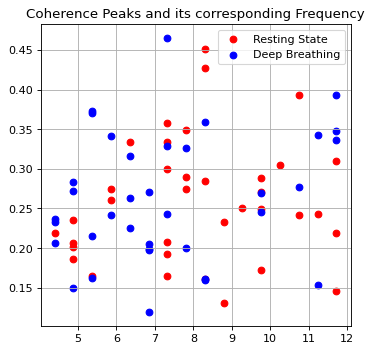

In [13]:
plt.figure(figsize=(5,5), dpi=80)
plt.scatter(RS_max_coh_f_arr, RS_max_coh_arr, color='red')
plt.scatter(DB_max_coh_f_arr, DB_max_coh_arr, color='blue')
plt.title("Coherence Peaks and its corresponding Frequency")
plt.grid()
plt.legend(["Resting State" , "Deep Breathing"])
plt.show()

### Scatter Plot of Resting State and Deep Breathing Average Coherence

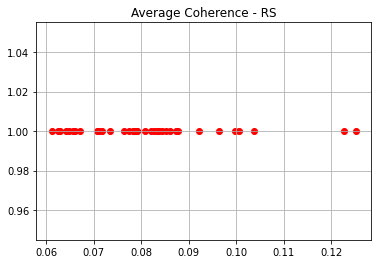

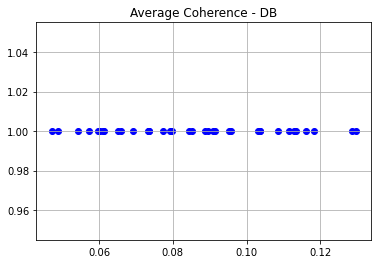

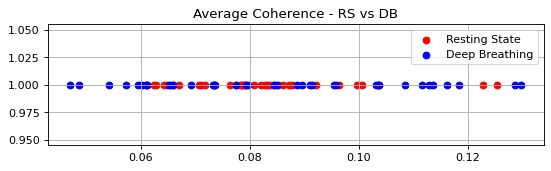

In [14]:
y_avg_val = np.ones(shape=[len(DB_average_coh_arr)])

plt.scatter(RS_average_coh_arr,y_avg_val, color='red')
plt.title("Average Coherence - RS")
plt.grid()
plt.show()

plt.scatter(DB_average_coh_arr,y_avg_val, color='blue')
plt.title("Average Coherence - DB")
plt.grid()
plt.show()

plt.figure(figsize=(8,2), dpi=80)
plt.scatter(RS_average_coh_arr,y_avg_val, color='red')
plt.scatter(DB_average_coh_arr,y_avg_val, color='blue')
plt.title("Average Coherence - RS vs DB")
plt.grid()
plt.legend(["Resting State" , "Deep Breathing"])
plt.show()